In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = datasets.load_wine()
wine = pd.DataFrame(data = np.c_[data['data'], data['target']], columns = data['feature_names'] + ['target'])

In [3]:
print(wine.head())
print(wine.describe())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

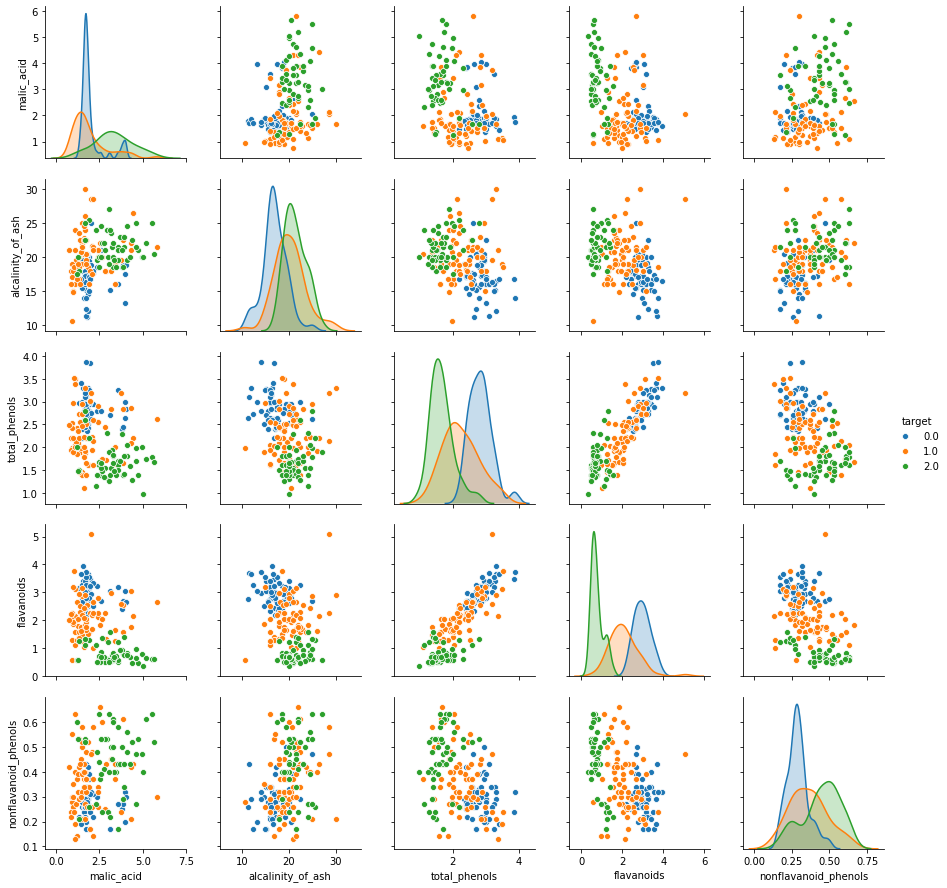

In [4]:
sns.pairplot(wine, vars = ['malic_acid', 'alcalinity_of_ash', 'total_phenols', 'flavanoids', 
                           'nonflavanoid_phenols'], hue = 'target')

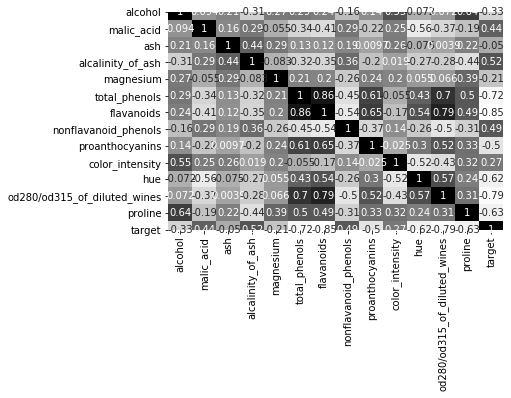

In [5]:
sns.heatmap(wine.corr(), linecolor = 'black', cbar = False, cmap = 'Greys', annot = True)

In [6]:
y = wine['target']
x = wine.drop('target', axis = 1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 101)

In [8]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [10]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

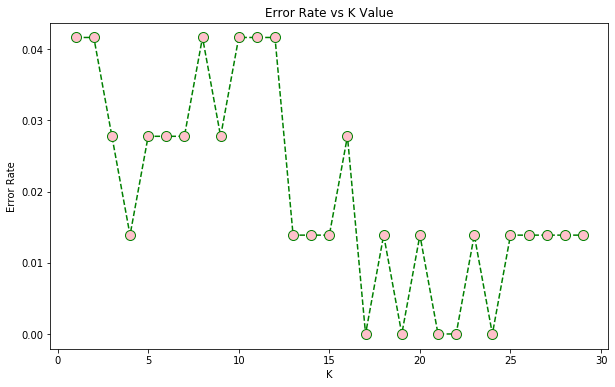

In [11]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), error_rate, color = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'pink', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')